<a href="https://colab.research.google.com/github/SreevadanMulugu/-Cracking-Encryption-Secrets-using-LSTM-and-Large-Scale-Data/blob/main/Colab%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
15000/15000 [==============================] - 115s 8ms/step - loss: 146040.3125 - val_loss: 35788.3125
Epoch 2/20
15000/15000 [==============================] - 124s 8ms/step - loss: 9456.0684 - val_loss: 514.0504
Epoch 3/20
15000/15000 [==============================] - 119s 8ms/step - loss: 125.4098 - val_loss: 10.4724
Epoch 4/20
15000/15000 [==============================] - 113s 8ms/step - loss: 4.7677 - val_loss: 1.1163
Epoch 5/20
15000/15000 [==============================] - 111s 7ms/step - loss: 2.4961 - val_loss: 9.2707
Epoch 6/20
15000/15000 [==============================] - 112s 7ms/step - loss: 2.0960 - val_loss: 3.2385
Epoch 7/20
15000/15000 [==============================] - 111s 7ms/step - loss: 1.9332 - val_loss: 0.4281
Epoch 8/20
15000/15000 [==============================] - 109s 7ms/step - loss: 1.8536 - val_loss: 0.6773
Epoch 9/20
15000/15000 [==============================] - 114s 8ms/step - loss: 1.7675 - val_loss: 0.1359
Epoch 10/20
15000/15000 [====

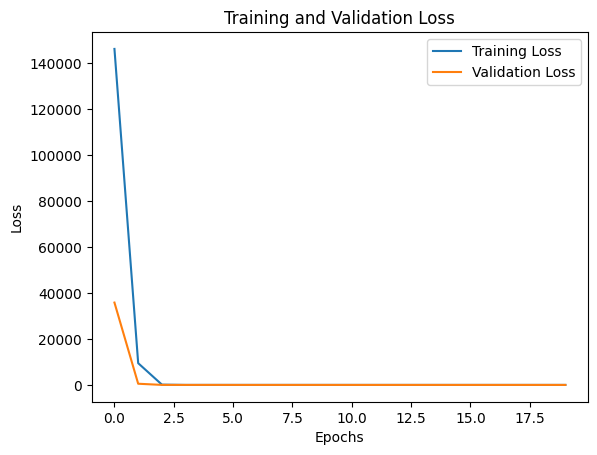

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import secrets

# Step 1: Generate random data within a specific range
def generate_random_data(num_samples, sequence_length, min_value, max_value):
    X = np.array([[secrets.randbelow(max_value - min_value) + min_value for _ in range(sequence_length)] for _ in range(num_samples)])
    y = X  # Target labels are the same as the input sequences
    return X, y

# Generate random data
num_samples = 100000
sequence_length = 10
min_value = 0  # Minimum value for random numbers
max_value = 1000  # Maximum value for random numbers
X, y = generate_random_data(num_samples, sequence_length, min_value, max_value)

# Preprocess the data
X = X.reshape(num_samples, sequence_length, 1)  # Reshape for LSTM input

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a neural network model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),  # Return sequences instead of a single value
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Use the trained model to make predictions
predictions = model.predict(X_test)

# Reshape y_test to match the shape of predictions
y_test_reshaped = y_test.reshape(predictions.shape)

# Calculate MSE manually
mse = np.mean(np.square(predictions - y_test_reshaped))
print("Mean Squared Error:", mse)

# Define tolerance for accuracy calculation
tolerance = 1  # Static tolerance limit

# Calculate accuracy
absolute_error = np.abs(predictions - y_test_reshaped)
accurate_predictions = np.mean(absolute_error <= tolerance)
accuracy = accurate_predictions * 100
print("Accuracy:", accuracy)

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
